# Symbolic Regression for GreyBody Factors(GBF)

## this section is for the GBF of Schwarzschild BH

### Load Dataset and Add Gaussian Noise
1. "import pysr" means Julia and Julia dependencies are installed; 
2. let's import all packages we need as well as the PySRRegressor

In [1]:
import pysr
import sympy
import numpy as np
from matplotlib import pyplot as plt
from pysr import PySRRegressor
from sklearn. model_selection import train_test_split
from scipy import special
from scipy.special import erf, erfc
from scipy.optimize import curve_fit

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


We load the data, and the dataset are conducted by numerical calculations@Marco. Regarding the Schwarzschild BH GBFs' $\Gamma_{lm}^s$, we ignore the $m$. (references see arXiv: 2409.02804; 2409.02807)

In [2]:
# Dataset
GBF_00_00 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=0_l=0.txt")
GBF_00_10 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=0_l=1.txt")
GBF_00_20 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=0_l=2.txt")
GBF_00_30 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=0_l=3.txt")
GBF_00_40 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=0_l=4.txt")
s00x, s00l0, s00l1, s00l2, s00l3, s00l4 = GBF_00_00[:, 0], GBF_00_00[:, 1], GBF_00_10[:, 1], GBF_00_20[:, 1], GBF_00_30[:, 1], GBF_00_40[:, 1]
np.savetxt("multispin/GBF_s=00.txt", np.c_[s00x, s00l0, s00l1, s00l2, s00l3, s00l4])
s00_array = np.column_stack((s00l0, s00l1, s00l2, s00l3, s00l4)) 

GBF_05_05 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=0.5_l=0.5.txt")
GBF_05_15 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=0.5_l=1.5.txt")
GBF_05_25 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=0.5_l=2.5.txt")
GBF_05_35 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=0.5_l=3.5.txt")
s05x, s05l0, s05l1, s05l2, s05l3 = GBF_05_05[:, 0], GBF_05_05[:, 1], GBF_05_15[:, 1], GBF_05_25[:, 1], GBF_05_35[:, 1]
np.savetxt("multispin/GBF_s=05.txt", np.c_[s05x, s05l0, s05l1, s05l2, s05l3])
s05_array = np.column_stack((s05l0, s05l1, s05l2, s05l3)) 

GBF_10_10 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=1_l=1.txt")
GBF_10_20 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=1_l=2.txt")
GBF_10_30 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=1_l=3.txt")
GBF_10_40 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=1_l=4.txt")
s10x, s10l0, s10l1, s10l2, s10l3 = GBF_10_10[:, 0], GBF_10_10[:, 1], GBF_10_20[:, 1], GBF_10_30[:, 1], GBF_10_40[:, 1]
np.savetxt("multispin/GBF_s=10.txt", np.c_[s10x, s10l0, s10l1, s10l2, s10l3]) 
s10_array = np.column_stack((s10l0, s10l1, s10l2, s10l3)) 

GBF_15_15 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=1.5_l=1.5.txt")
GBF_15_25 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=1.5_l=2.5.txt")
GBF_15_35 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=1.5_l=3.5.txt")
s15x, s15l0, s15l1, s15l2 = GBF_15_15[:, 0], GBF_15_15[:, 1], GBF_15_25[:, 1], GBF_15_35[:, 1]
np.savetxt("multispin/GBF_s=15.txt", np.c_[s15x, s15l0, s15l1, s15l2]) 
s15_array = np.column_stack((s15l0, s15l1, s15l2)) 

GBF_20_20 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=2_l=2.txt") 
GBF_20_30 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=2_l=3.txt")
GBF_20_40 = np.loadtxt("/Users/yuangw/Documents/GitHub/GBF/multispin/GBF_s=2_l=4.txt")
s20x, s20l0, s20l1, s20l2 = GBF_20_20[:, 0], GBF_20_20[:, 1], GBF_20_30[:, 1], GBF_20_40[:, 1]
np.savetxt("multispin/GBF_s=20.txt", np.c_[s20x, s20l0, s20l1, s20l2])
s20_array = np.column_stack((s20l0, s20l1, s20l2))


Plot the numerical dataset.

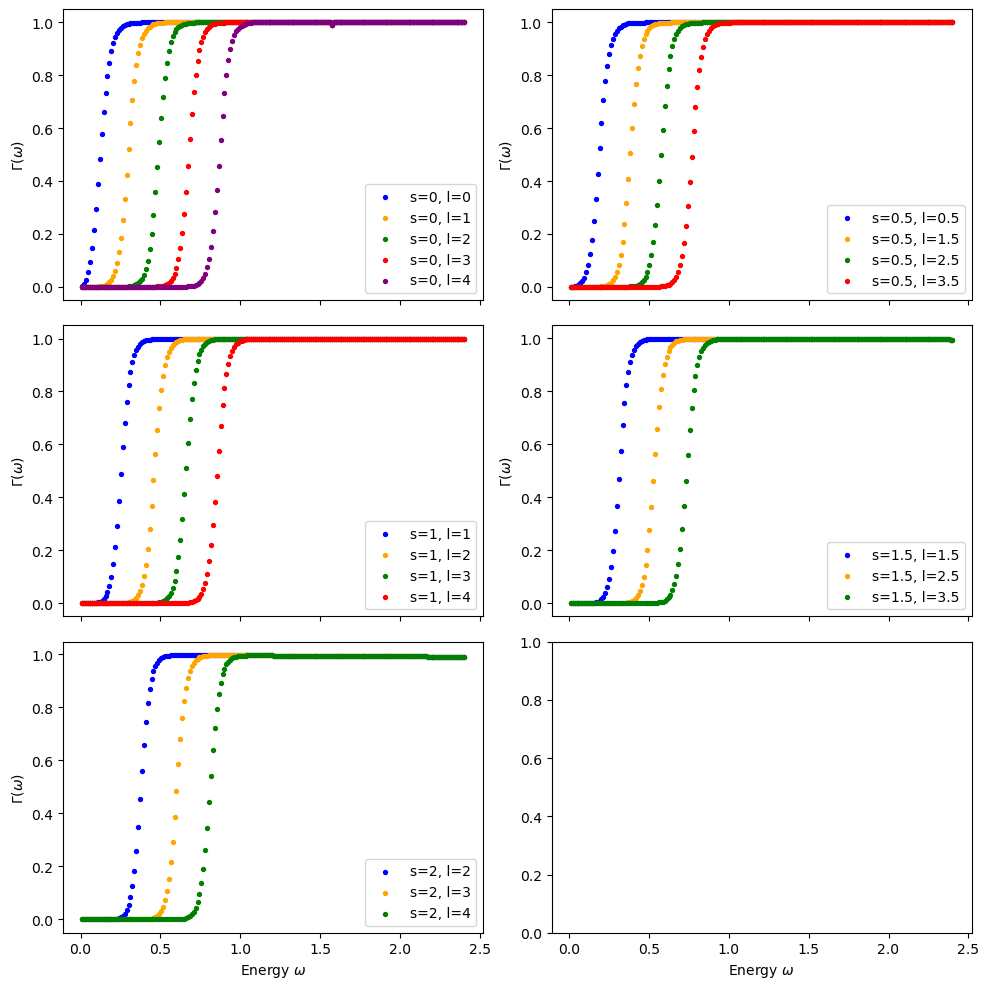

In [3]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10), sharex=True)

axs[0, 0].scatter(s00x, s00l0, color= 'blue', s=8, label='s=0, l=0')
axs[0, 0].scatter(s00x, s00l1, color= 'orange', s=8, label='s=0, l=1')
axs[0, 0].scatter(s00x, s00l2, color= 'green', s=8, label='s=0, l=2')
axs[0, 0].scatter(s00x, s00l3, color= 'red', s=8, label='s=0, l=3')
axs[0, 0].scatter(s00x, s00l4, color= 'purple', s=8, label='s=0, l=4')
# axs[0, 0].set_xlabel("Energy $\omega$")
axs[0, 0].set_ylabel("$\Gamma (\omega)$")
axs[0, 0].legend(loc = 'lower right')

axs[0, 1].scatter(s05x, s05l0, color= 'blue', s=8, label='s=0.5, l=0.5')
axs[0, 1].scatter(s05x, s05l1, color= 'orange', s=8, label='s=0.5, l=1.5')
axs[0, 1].scatter(s05x, s05l2, color= 'green', s=8, label='s=0.5, l=2.5')
axs[0, 1].scatter(s05x, s05l3, color= 'red', s=8, label='s=0.5, l=3.5')
# axs[0, 1].set_xlabel("Energy $\omega$")
axs[0, 1].set_ylabel("$\Gamma (\omega)$")
axs[0, 1].legend(loc = 'lower right')

axs[1, 0].scatter(s10x, s10l0, color= 'blue', s=8, label='s=1, l=1')
axs[1, 0].scatter(s10x, s10l1, color= 'orange', s=8, label='s=1, l=2')
axs[1, 0].scatter(s10x, s10l2, color= 'green', s=8, label='s=1, l=3')
axs[1, 0].scatter(s10x, s10l3, color= 'red', s=8, label='s=1, l=4')
# axs[1, 0].set_xlabel("Energy $\omega$")
axs[1, 0].set_ylabel("$\Gamma (\omega)$")
axs[1, 0].legend(loc = 'lower right')

axs[1, 1].scatter(s15x, s15l0, color= 'blue', s=8, label='s=1.5, l=1.5')
axs[1, 1].scatter(s15x, s15l1, color= 'orange', s=8, label='s=1.5, l=2.5')
axs[1, 1].scatter(s15x, s15l2, color= 'green', s=8, label='s=1.5, l=3.5')
# axs[1, 1].set_xlabel("Energy $\omega$")
axs[1, 1].set_ylabel("$\Gamma (\omega)$")
axs[1, 1].legend(loc = 'lower right')

axs[2, 0].scatter(s20x, s20l0, color= 'blue', s=8, label='s=2, l=2')
axs[2, 0].scatter(s20x, s20l1, color= 'orange', s=8, label='s=2, l=3')
axs[2, 0].scatter(s20x, s20l2, color= 'green', s=8, label='s=2, l=4')
axs[2, 0].set_xlabel("Energy $\omega$")
axs[2, 0].set_ylabel("$\Gamma (\omega)$")
axs[2, 0].legend(loc = 'lower right')

axs[2, 1].set_xlabel("Energy $\omega$")

plt.tight_layout()
plt.show()

### Using Scipy.optimize to fit $\Gamma^{s=0}_{l=0/1/2/3/4}$
Here, we try to fit the data of $\Gamma^{s=0}_{l=0/1/2/3/4}$ with 
$$\Gamma^{s=0}_{l=0/1/2/3/4} (\omega, l) =\frac{1}{2} [ {\rm erf}(a + b l + c\omega) + 1] \qquad{\rm scipy.optimize}$$
$$\Gamma^{s=0}_{l=0/1/2/3/4} (\omega, l) = {\rm erf} [{\rm erfc} (a + b l + c\omega)] $$ 
$$\Gamma^{s=0}_{l=0/1/2/3/4} (\omega, l) = {\rm erf} [{\rm erfc} (a + b l + c\omega + d\omega^2)] $$ 
$$\Gamma^{s=0}_{l=0/1/2/3/4} (\omega, l) = {\rm erf} [{\rm erfc} (a + b l + c\omega + d\omega^2 + e\omega^3)]$$ 
1. Fitted 0.5 * (erf(a + b*l + c*w) + 1) parameters: a = -1.586, b = -2.530, c = 13.533
2. Fitted erf(erfc(a + b*l + c*w)) parameters: a = 1.688, b = 1.880, c = -10.057
3. Fitted erf(erfc(a + b*l + c*w + d*w^2)) parameters: a = 1.815, b = 1.889, c = -10.797, d = 0.705
4. Fitted erf(erfc(a + b*l + c*w + d*w^2 + e*w^3)) parameters: a = 1.898, b = 1.864, c = -11.642, d = 3.059, e = -1.578

Fitted 0.5 * (erf(a + b*l + c*w) + 1) parameters: a = -1.586, b = -2.530, c = 13.533
Fitted erf(erfc(a + b*l + c*w)) parameters: a = 1.688, b = 1.880, c = -10.057
Fitted erf(erfc(a + b*l + c*w + d*w^2)) parameters: a = 1.815, b = 1.889, c = -10.797, d = 0.705
Fitted erf(erfc(a + b*l + c*w + d*w^2 + e*w^3)) parameters: a = 1.898, b = 1.864, c = -11.642, d = 3.059, e = -1.578


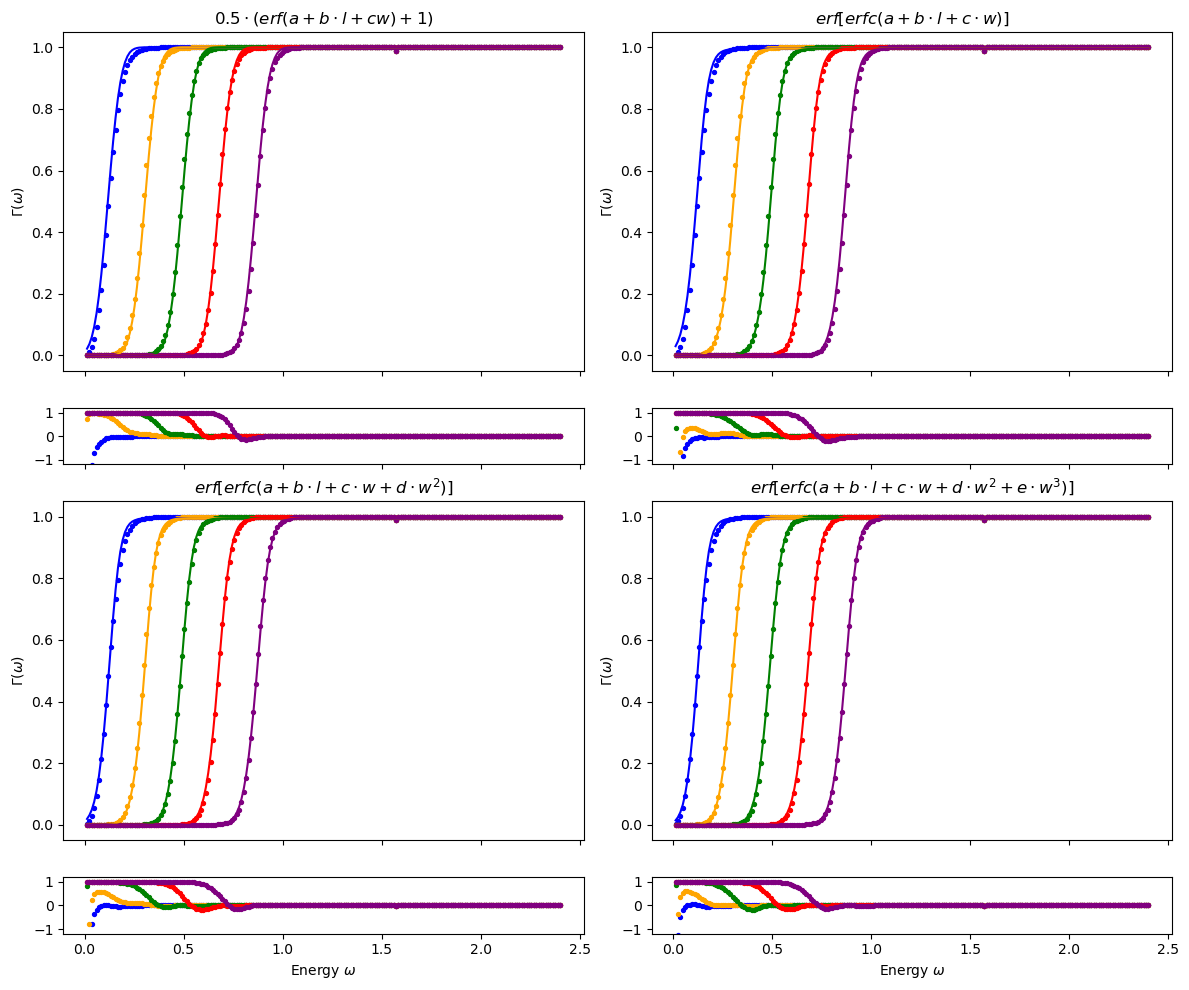

In [4]:
# define fitting functions
def fit_function001(data, a, b, c):
    x, y = data
    return 0.5 * (erf(a + b*y + c*x) + 1)

def fit_function002(data, a, b, c):
    x, y = data
    return erf(erfc(a + b*y + c*x))

def fit_function003(data, a ,b, c, d):
    x, y = data
    return erf(erfc(a + b*y + c*x + d*x**2))

def fit_function004(data, a, b, c, d, e):
    x, y = data
    return erf(erfc(a + b*y + c*x + d*x**2 + e*x**3))


# grid and flattening
l_value00 = np.array([0, 1, 2, 3, 4])
x_grid00, l_grid00 = np.meshgrid(s00x, l_value00, indexing='ij')

x_flat00 = x_grid00.flatten()
l_flat00 = l_grid00.flatten()
y_flat00 = s00_array.flatten()

# fit the models
popt001, _ = curve_fit(fit_function001, (x_flat00, l_flat00), y_flat00, p0=[-1.6, -2.5, 13.5])
popt002, _ = curve_fit(fit_function002, (x_flat00, l_flat00), y_flat00, p0=[1.7, 1.8, -10.0])
popt003, _ = curve_fit(fit_function003, (x_flat00, l_flat00), y_flat00, p0=[1.7, 1.8, -10.0, 0.7])
popt004, _ = curve_fit(fit_function004, (x_flat00, l_flat00), y_flat00, p0=[1.7, 1.8, -10.0, 0.7, 0.1])

a_fit1, b_fit1, c_fit1 = popt001
print(f"Fitted 0.5 * (erf(a + b*l + c*w) + 1) parameters: a = {a_fit1:.3f}, b = {b_fit1:.3f}, c = {c_fit1:.3f}")
a_fit2, b_fit2, c_fit2 = popt002
print(f"Fitted erf(erfc(a + b*l + c*w)) parameters: a = {a_fit2:.3f}, b = {b_fit2:.3f}, c = {c_fit2:.3f}")
a_fit3, b_fit3, c_fit3, d_fit3 = popt003
print(f"Fitted erf(erfc(a + b*l + c*w + d*w^2)) parameters: a = {a_fit3:.3f}, b = {b_fit3:.3f}, c = {c_fit3:.3f}, d = {d_fit3:.3f}")
a_fit4, b_fit4, c_fit4, d_fit4, e_fit4 = popt004
print(f"Fitted erf(erfc(a + b*l + c*w + d*w^2 + e*w^3)) parameters: a = {a_fit4:.3f}, b = {b_fit4:.3f}, c = {c_fit4:.3f}, d = {d_fit4:.3f}, e = {e_fit4:.3f}")


# Create the figure with subplots and specified height ratios
fig, axs = plt.subplots(4, 2, figsize=(12, 10), sharex=True, gridspec_kw={'height_ratios': [6, 1] * 2})

# Plot configurations
fit_functions00 = [fit_function001, fit_function002, fit_function003, fit_function004]
params00 = [popt001, popt002, popt003, popt004]
titles00 = [
    r'$0.5 \cdot (erf(a + b \cdot l + cw) + 1)$',
    r'$erf[erfc(a + b \cdot l + c \cdot w)]$', 
    r'$erf[erfc(a + b \cdot l + c \cdot w + d \cdot w^2)]$', 
    r'$erf[erfc(a + b \cdot l + c \cdot w + d \cdot w^2 + e \cdot w^3)]$'
]

# Loop over the subplots for main plots and residuals
for i, (fit_func, popt, title) in enumerate(zip(fit_functions00, params00, titles00)):
    row = (i // 2) * 2   # To determine which row the main plot is on (0, 2)
    col = i % 2          # To determine which column (0 or 1)

    main_ax = axs[row, col]       # Main plot
    res_ax = axs[row + 1, col]    # Residuals plot just below


    # Plot fitted curves and data points for each 'l_value'
    for j, color in enumerate(['blue', 'orange', 'green', 'red', 'purple']):
        main_ax.plot(s00x, fit_func((s00x, l_value00[j]), *popt), color=color)
        main_ax.scatter(s00x, s00_array[:, j], color=color, s=8, label=f'Data: s=0, l={j}')
        res_ax.scatter(s00x, (s00_array[:, j] - fit_func((s00x, l_value00[j]), *popt)) / s00_array[:, j], color=color, s=8)

    # Set titles and labels
    main_ax.set_title(title)
    main_ax.set_ylabel(r'$\Gamma(\omega)$')
    res_ax.set_ylim(-1.2, 1.2)

axs[-1, 0].set_xlabel(r'Energy $\omega$')
axs[-1, 1].set_xlabel(r'Energy $\omega$')
plt.tight_layout(h_pad=0.5)
plt.show()

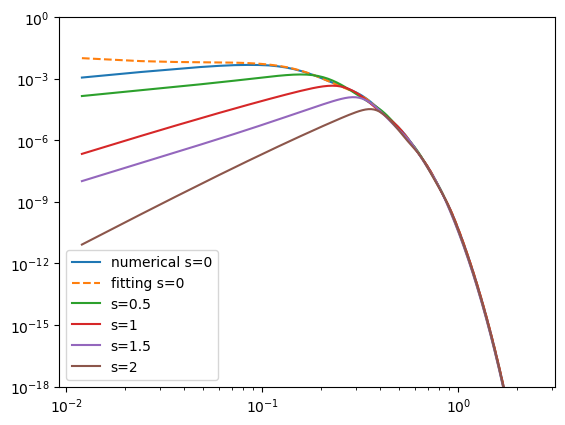

In [5]:
from scipy.integrate import quad

k0 = 1/4
s00l = [s00l0, s00l1, s00l2, s00l3, s00l4]
s05l = [s05l0, s05l1, s05l2, s05l3]
s10l = [s10l0, s10l1, s10l2, s10l3]
s15l = [s15l0, s15l1, s15l2]
s20l = [s20l0, s20l1, s20l2]

def sum_gamma00(w):
    return sum((2*l + 1) * s00l[l] / (np.exp(2*np.pi*w/k0) - 1) for l in range(5) )/(2*np.pi)

def sum_gamma05(w):
    return sum((2*(l+0.5) + 1) * s05l[l] / (np.exp(2*np.pi*w/k0) - 1) for l in range(4) )/(2*np.pi)

def sum_gamma10(w):
    return sum((2*(l+1) + 1) * s10l[l] / (np.exp(2*np.pi*w/k0) - 1) for l in range(4) )/(2*np.pi)

def sum_gamma15(w):
    return sum((2*(l+1.5) + 1) * s15l[l] / (np.exp(2*np.pi*w/k0) - 1) for l in range(3) )/(2*np.pi)

def sum_gamma20(w):
    return sum((2*(l+2) + 1) * s20l[l] / (np.exp(2*np.pi*w/k0) - 1) for l in range(3) )/(2*np.pi)

##########
def fit_gamma00(w):
    return sum((2*l + 1) * fit_function001((s00x, l), *popt001) / (np.exp(2*np.pi*w/k0) - 1) for l in range(5) )/(2*np.pi)


plt.plot(s00x, sum_gamma00(s00x), label='numerical s=0')
plt.plot(s00x, fit_gamma00(s00x), linestyle='--', label='fitting s=0')
plt.plot(s05x, sum_gamma05(s05x), label='s=0.5')
plt.plot(s10x, sum_gamma10(s10x), label='s=1')
plt.plot(s15x, sum_gamma15(s15x), label='s=1.5')
plt.plot(s20x, sum_gamma20(s20x), label='s=2')
plt.ylim(1e-18, 1)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

#### Comparing different functions

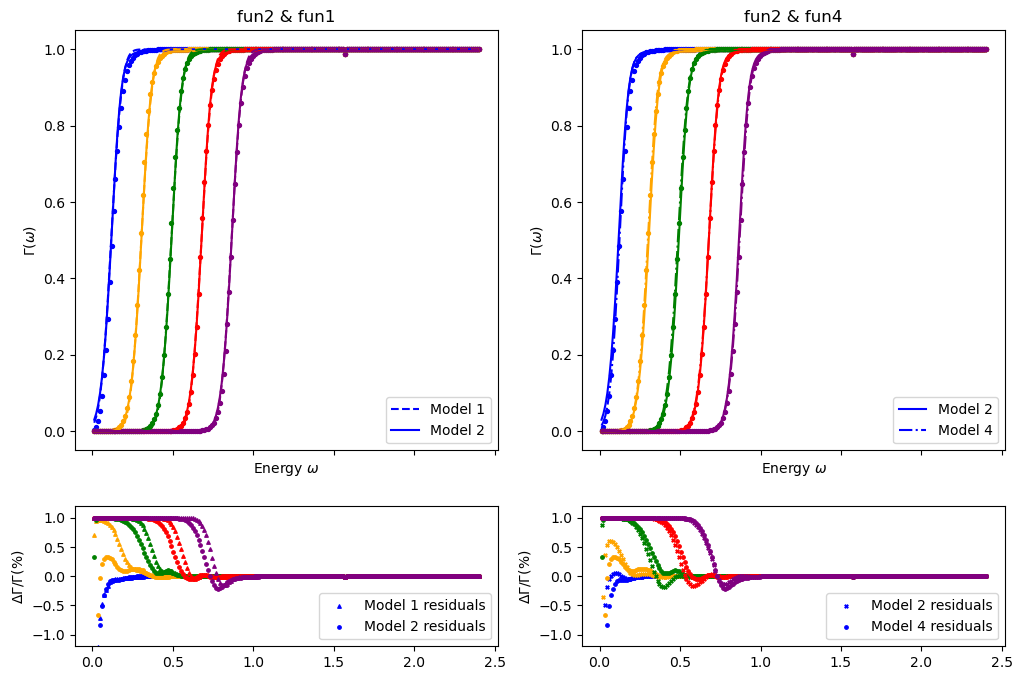

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Plot function models in axs[0, 0] with multiple lines
colors = ['blue', 'orange', 'green', 'red', 'purple']
s00l = [s00l0, s00l1, s00l2, s00l3, s00l4]
for i, color in enumerate(colors):
    axs[0, 0].plot(s10x, fit_function001((s10x, i), *popt001), linestyle='--', color=color)
    axs[0, 0].plot(s10x, fit_function002((s10x, i), *popt002), color=color)
    axs[0, 0].scatter(s00x, s00l[i], color=color, s=8)

axs[0, 0].set_title('fun2 & fun1')
axs[0, 0].set_xlabel("Energy $\omega$")
axs[0, 0].set_ylabel("$\Gamma (\omega)$")
axs[0, 0].legend(['Model 1', 'Model 2'], loc='lower right')  # Set one legend per model type

# Plot relative differences in axs[1, 0]
for i, color in enumerate(colors):
    axs[1, 0].scatter(s00x, (s00l[i] - fit_function001((s10x, i), *popt001)) / s00l[i], color=color, s=6, marker='^')
    axs[1, 0].scatter(s00x, (s00l[i] - fit_function002((s10x, i), *popt002)) / s00l[i], color=color, s=6, marker='o')
axs[1, 0].set_ylim(-1.2, 1.2)
axs[1, 0].set_ylabel('$\Delta \Gamma/\Gamma$(%)')
axs[1, 0].legend(['Model 1 residuals', 'Model 2 residuals'], loc='lower right')

# Plot function models in axs[0, 1]
for i, color in enumerate(colors):
    axs[0, 1].plot(s10x, fit_function002((s10x, i), *popt002), color=color)
    axs[0, 1].plot(s10x, fit_function004((s10x, i), *popt004), linestyle='-.', color=color)
    axs[0, 1].scatter(s00x, s00l[i], color=color, s=8)
axs[0, 1].set_title('fun2 & fun4')
axs[0, 1].set_xlabel("Energy $\omega$")
axs[0, 1].set_ylabel("$\Gamma (\omega)$")
axs[0, 1].legend(['Model 2', 'Model 4'], loc='lower right')

# Plot relative differences in axs[1, 1]
for i, color in enumerate(colors):
    axs[1, 1].scatter(s00x, (s00l[i] - fit_function004((s10x, i), *popt004)) / s00l[i], color=color, s=6, marker='x')
    axs[1, 1].scatter(s00x, (s00l[i] - fit_function002((s10x, i), *popt002)) / s00l[i], color=color, s=6, marker='o')
axs[1, 1].set_ylim(-1.2, 1.2)
axs[1, 1].set_ylabel('$\Delta \Gamma/\Gamma$(%)')
axs[1, 1].legend(['Model 2 residuals', 'Model 4 residuals'], loc='lower right')

plt.show()

### Using Scipy.optimize to fit $\Gamma^{s=0.5}_{l=0.5/1.5/2.5/3.5}$
Here, we try to fit the data of $\Gamma^{s=0.5}_{l=0.5/1.5/2.5/3.5}$ with 
$$\Gamma^{s=0.5}_{l=0.5/1.5/2.5/3.5} (\omega, l) =\frac{1}{2} [ {\rm erf}(a + b l + c\omega) + 1] \qquad{\rm scipy.optimize}$$
$$\Gamma^{s=0.5}_{l=0.5/1.5/2.5/3.5} (\omega, l) = {\rm erf} [{\rm erfc} (a + b l + c\omega)] $$ 
$$\Gamma^{s=0.5}_{l=0.5/1.5/2.5/3.5} (\omega, l) = {\rm erf} [{\rm erfc} (a + b l + c\omega + d\omega^2)] $$ 
$$\Gamma^{s=0.5}_{l=0.5/1.5/2.5/3.5} (\omega, l) = {\rm erf} [{\rm erfc} (a + b l + c\omega + d\omega^2 + e\omega^3)]$$ 
1. Fitted 0.5 * (erf(a + b*l + c*w) + 1) parameters: a = -1.279, b = -2.636, c = 13.651
2. Fitted erf(erfc(a + b*l + c*w)) parameters: a = 1.461, b = 1.960, c = -10.149
3. Fitted erf(erfc(a + b*l + c*w + d*w^2)) parameters: a = 1.451, b = 1.960, c = -10.099, d = -0.053
4. Fitted erf(erfc(a + b*l + c*w + d*w^2 + e*w^3)) parameters: a = 1.453, b = 1.960, c = -10.112, d = -0.017, e = -0.025

Fitted 0.5 * (erf(a + b*l + c*w) + 1) parameters: a = -1.279, b = -2.636, c = 13.651
Fitted erf(erfc(a + b*l + c*w)) parameters: a = 1.461, b = 1.960, c = -10.149
Fitted erf(erfc(a + b*l + c*w + d*w^2)) parameters: a = 1.451, b = 1.960, c = -10.099, d = -0.053
Fitted erf(erfc(a + b*l + c*w + d*w^2 + e*w^3)) parameters: a = 1.453, b = 1.960, c = -10.112, d = -0.017, e = -0.025


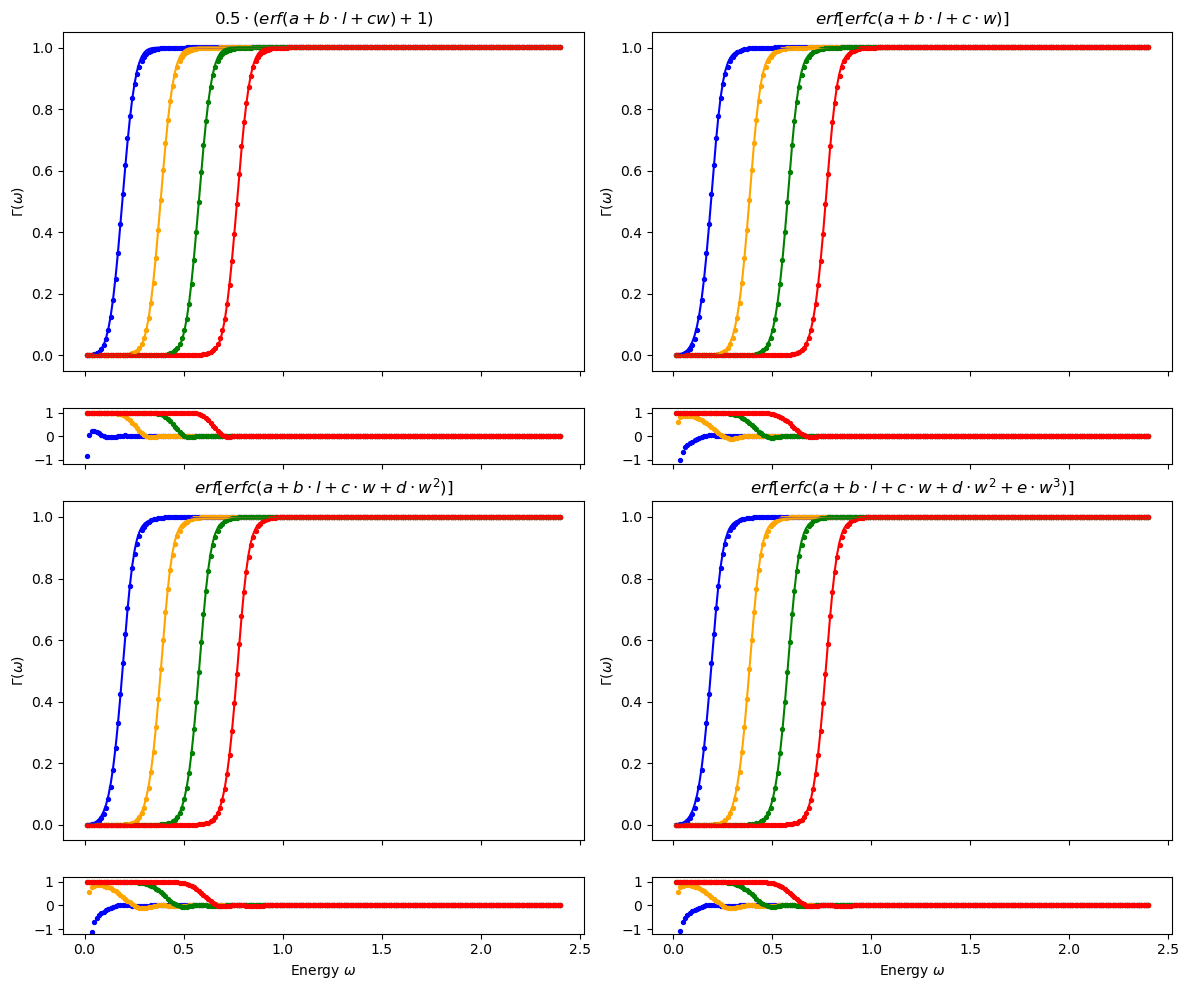

In [7]:
# Define fitting functions
def fit_function051(data, a, b, c):
    x, y = data
    return 0.5 * (erf(a + b*y + c*x) + 1)

def fit_function052(data, a, b, c):
    x, y = data
    return erf(erfc(a + b*y + c*x))

def fit_function053(data, a ,b, c, d):
    x, y = data
    return erf(erfc(a + b*y + c*x + d*x**2))

def fit_function054(data, a, b, c, d, e):
    x, y = data
    return erf(erfc(a + b*y + c*x + d*x**2 + e*x**3))

# Grid and flattening
l_value05 = np.array([0.5, 1.5, 2.5, 3.5])
x_grid05, l_grid05 = np.meshgrid(s05x, l_value05, indexing='ij')

x_flat05 = x_grid05.flatten()  # shape (400, )
l_flat05 = l_grid05.flatten()  # shape (400, )
y_flat05 = s05_array.flatten()

# Fit the models
popt051, _ = curve_fit(fit_function051, (x_flat05, l_flat05), y_flat05, p0=[-1.6, -2.5, 13.5])
popt052, _ = curve_fit(fit_function052, (x_flat05, l_flat05), y_flat05, p0=[1.7, 1.8, -10.0])
popt053, _ = curve_fit(fit_function053, (x_flat05, l_flat05), y_flat05, p0=[1.7, 1.8, -10.0, 0.7])
popt054, _ = curve_fit(fit_function054, (x_flat05, l_flat05), y_flat05, p0=[1.7, 1.8, -10.0, 0.7, 0.1])

a_fit1, b_fit1, c_fit1 = popt051
print(f"Fitted 0.5 * (erf(a + b*l + c*w) + 1) parameters: a = {a_fit1:.3f}, b = {b_fit1:.3f}, c = {c_fit1:.3f}")
a_fit2, b_fit2, c_fit2 = popt052
print(f"Fitted erf(erfc(a + b*l + c*w)) parameters: a = {a_fit2:.3f}, b = {b_fit2:.3f}, c = {c_fit2:.3f}")
a_fit3, b_fit3, c_fit3, d_fit3 = popt053
print(f"Fitted erf(erfc(a + b*l + c*w + d*w^2)) parameters: a = {a_fit3:.3f}, b = {b_fit3:.3f}, c = {c_fit3:.3f}, d = {d_fit3:.3f}")
a_fit4, b_fit4, c_fit4, d_fit4, e_fit4 = popt054
print(f"Fitted erf(erfc(a + b*l + c*w + d*w^2 + e*w^3)) parameters: a = {a_fit4:.3f}, b = {b_fit4:.3f}, c = {c_fit4:.3f}, d = {d_fit4:.3f}, e = {e_fit4:.3f}")


# Create the figure with subplots and specified height ratios
fig, axs = plt.subplots(4, 2, figsize=(12, 10), sharex=True, gridspec_kw={'height_ratios': [6, 1] * 2})

# Plot configurations
fit_functions05 = [fit_function051, fit_function052, fit_function053, fit_function054]
params05 = [popt051, popt052, popt053, popt054]
titles05 = [
    r'$0.5 \cdot (erf(a + b \cdot l + cw) + 1)$',
    r'$erf[erfc(a + b \cdot l + c \cdot w)]$', 
    r'$erf[erfc(a + b \cdot l + c \cdot w + d \cdot w^2)]$', 
    r'$erf[erfc(a + b \cdot l + c \cdot w + d \cdot w^2 + e \cdot w^3)]$'
]

# Loop over the subplots for main plots and residuals
for i, (fit_func, popt, title) in enumerate(zip(fit_functions05, params05, titles05)):
    row = (i // 2) * 2   # To determine which row the main plot is on (0, 2)
    col = i % 2          # To determine which column (0 or 1)

    main_ax = axs[row, col]       # Main plot
    res_ax = axs[row + 1, col]    # Residuals plot just below


    # Plot fitted curves and data points for each 'l_value'
    for j, color in enumerate(['blue', 'orange', 'green', 'red']):
        main_ax.plot(s05x, fit_func((s05x, l_value05[j]), *popt), color=color)
        main_ax.scatter(s05x, s05_array[:, j], color=color, s=8, label=f'Data: s=1, l={j+1}')
        res_ax.scatter(s05x, (s05_array[:, j] - fit_func((s05x, l_value05[j]), *popt)) / s05_array[:, j], color=color, s=8)

    # Set titles and labels
    main_ax.set_title(title)
    main_ax.set_ylabel(r'$\Gamma(\omega)$')
    res_ax.set_ylim(-1.2, 1.2)

axs[-1, 0].set_xlabel(r'Energy $\omega$')
axs[-1, 1].set_xlabel(r'Energy $\omega$')
plt.tight_layout(h_pad=0.5)
plt.show()

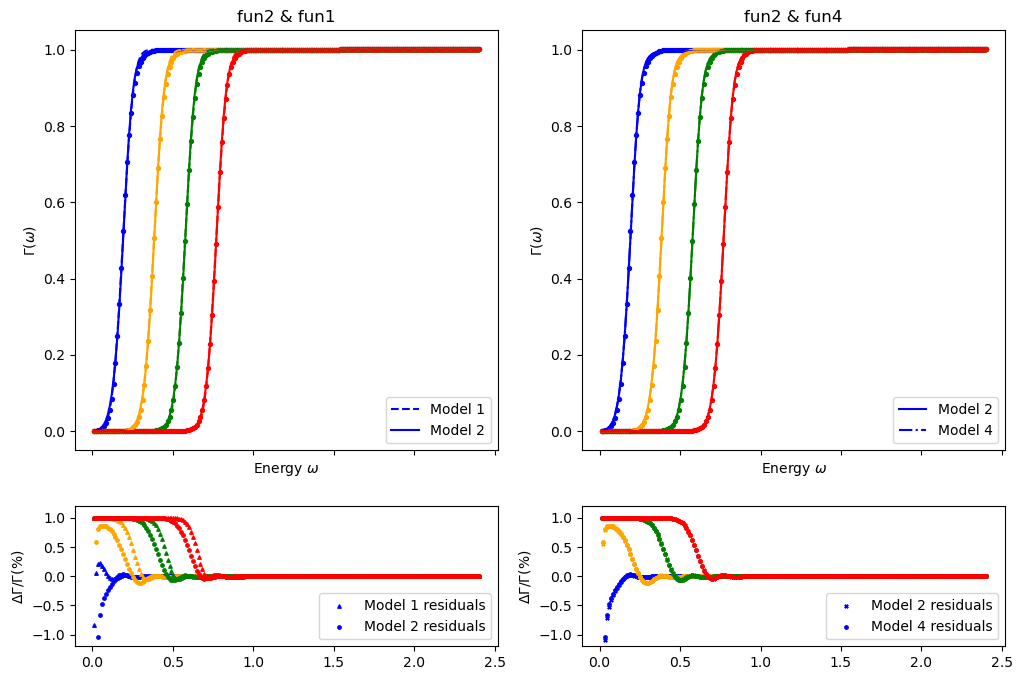

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Plot function models in axs[0, 0] with multiple lines
colors = ['blue', 'orange', 'green', 'red']
s05l = [s05l0, s05l1, s05l2, s05l3]
for i, color in enumerate(colors):
    axs[0, 0].plot(s05x, fit_function051((s10x, i+0.5), *popt051), linestyle='--', color=color)
    axs[0, 0].plot(s05x, fit_function052((s10x, i+0.5), *popt052), color=color)
    axs[0, 0].scatter(s05x, s05l[i], color=color, s=8)

axs[0, 0].set_title('fun2 & fun1')
axs[0, 0].set_xlabel("Energy $\omega$")
axs[0, 0].set_ylabel("$\Gamma (\omega)$")
axs[0, 0].legend(['Model 1', 'Model 2'], loc='lower right')  # Set one legend per model type

# Plot relative differences in axs[1, 0]
for i, color in enumerate(colors):
    axs[1, 0].scatter(s05x, (s05l[i] - fit_function051((s10x, i+0.5), *popt051)) / s05l[i], color=color, s=6, marker='^')
    axs[1, 0].scatter(s05x, (s05l[i] - fit_function052((s10x, i+0.5), *popt052)) / s05l[i], color=color, s=6, marker='o')
axs[1, 0].set_ylim(-1.2, 1.2)
axs[1, 0].set_ylabel('$\Delta \Gamma/\Gamma$(%)')
axs[1, 0].legend(['Model 1 residuals', 'Model 2 residuals'], loc='lower right')

# Plot function models in axs[0, 1]
for i, color in enumerate(colors):
    axs[0, 1].plot(s05x, fit_function052((s10x, i+0.5), *popt052), color=color)
    axs[0, 1].plot(s05x, fit_function054((s10x, i+0.5), *popt054), linestyle='-.', color=color)
    axs[0, 1].scatter(s05x, s05l[i], color=color, s=8)
axs[0, 1].set_title('fun2 & fun4')
axs[0, 1].set_xlabel("Energy $\omega$")
axs[0, 1].set_ylabel("$\Gamma (\omega)$")
axs[0, 1].legend(['Model 2', 'Model 4'], loc='lower right')

# Plot relative differences in axs[1, 1]
for i, color in enumerate(colors):
    axs[1, 1].scatter(s05x, (s05l[i] - fit_function054((s10x, i+0.5), *popt054)) / s05l[i], color=color, s=6, marker='x')
    axs[1, 1].scatter(s05x, (s05l[i] - fit_function052((s10x, i+0.5), *popt052)) / s05l[i], color=color, s=6, marker='o')
axs[1, 1].set_ylim(-1.2, 1.2)
axs[1, 1].set_ylabel('$\Delta \Gamma/\Gamma$(%)')
axs[1, 1].legend(['Model 2 residuals', 'Model 4 residuals'], loc='lower right')

plt.show()

### Using Scipy.optimize to fit $\Gamma^{s=1}_{l=1/2/3/4}$
Here, we try to fit the data of $\Gamma^{s=1}_{l=1/2/3/4}$ with 
$$\Gamma^{s=1}_{l=1/2/3/4} (\omega, l) =\frac{1}{2} [ {\rm erf}(a + b l + c\omega) + 1] \qquad{\rm scipy.optimize}$$
$$\Gamma^{s=1}_{l=1/2/3/4} (\omega, l) = {\rm erf} [{\rm erfc} (a + b l + c\omega)] $$ 
$$\Gamma^{s=1}_{l=1/2/3/4} (\omega, l) = {\rm erf} [{\rm erfc} (a + b l + c\omega + d\omega^2)] $$ 
$$\Gamma^{s=1}_{l=1/2/3/4} (\omega, l) = {\rm erf} [{\rm erfc} (a + b l + c\omega + d\omega^2 + e\omega^3)]$$ 
1. Fitted 0.5 * (erf(a + b*l + c*w) + 1) parameters: a = -0.790, b = -2.770, c = 13.847
2. Fitted erf(erfc(a + b*l + c*w)) parameters: a = 1.097, b = 2.059, c = -10.293
3. Fitted erf(erfc(a + b*l + c*w + d*w^2)) parameters: a = 0.957, b = 2.065, c = -9.707, d = -0.554
4. Fitted erf(erfc(a + b*l + c*w + d*w^2 + e*w^3)) parameters: a = 0.928, b = 2.068, c = -9.523, d = -0.956, e = 0.242

Fitted 0.5 * (erf(a + b*l + c*w) + 1) parameters: a = -0.790, b = -2.770, c = 13.847
Fitted erf(erfc(a + b*l + c*w)) parameters: a = 1.097, b = 2.059, c = -10.293
Fitted erf(erfc(a + b*l + c*w + d*w^2)) parameters: a = 0.957, b = 2.065, c = -9.707, d = -0.554
Fitted erf(erfc(a + b*l + c*w + d*w^2 + e*w^3)) parameters: a = 0.928, b = 2.068, c = -9.523, d = -0.956, e = 0.242


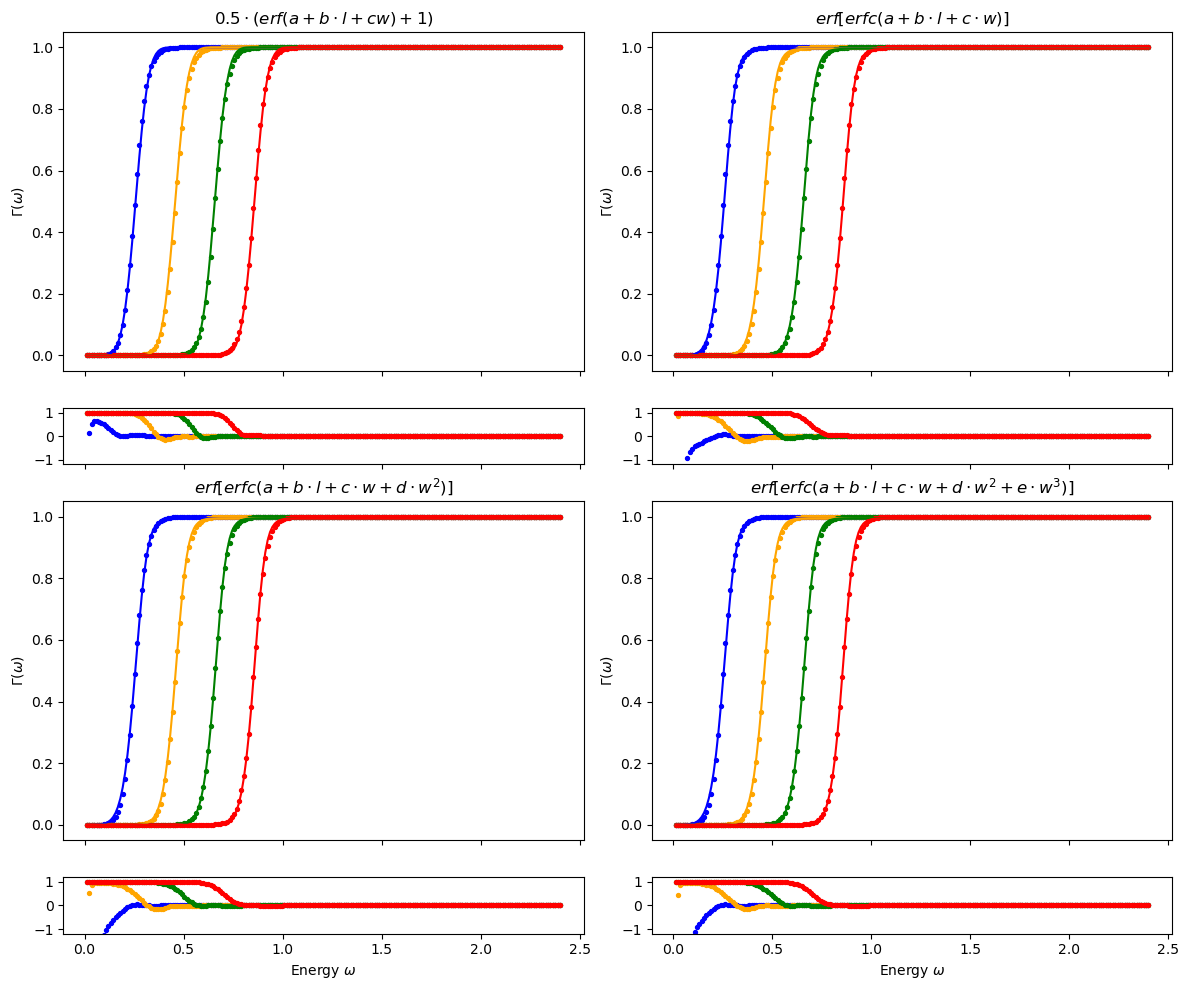

In [9]:
# Define fitting functions
def fit_function101(data, a, b, c):
    x, y = data
    return 0.5 * (erf(a + b*y + c*x) + 1)

def fit_function102(data, a, b, c):
    x, y = data
    return erf(erfc(a + b*y + c*x))

def fit_function103(data, a ,b, c, d):
    x, y = data
    return erf(erfc(a + b*y + c*x + d*x**2))

def fit_function104(data, a, b, c, d, e):
    x, y = data
    return erf(erfc(a + b*y + c*x + d*x**2 + e*x**3))

# Grid and flattening
l_value10 = np.array([1, 2, 3, 4])
x_grid10, l_grid10 = np.meshgrid(s10x, l_value10, indexing='ij')

x_flat10 = x_grid10.flatten()  # shape (400, )
l_flat10 = l_grid10.flatten()  # shape (400, )
y_flat10 = s10_array.flatten()

# Fit the models
popt101, _ = curve_fit(fit_function101, (x_flat10, l_flat10), y_flat10, p0=[-0.8, -2.7, 6.9])
popt102, _ = curve_fit(fit_function102, (x_flat10, l_flat10), y_flat10, p0=[1.1, 2.0, -5.1])
popt103, _ = curve_fit(fit_function103, (x_flat10, l_flat10), y_flat10, p0=[0.9, 2.1, -4.8, -0.1])
popt104, _ = curve_fit(fit_function104, (x_flat10, l_flat10), y_flat10, p0=[0.9, 2.1, -4.8, -0.2, 0.1])

a_fit1, b_fit1, c_fit1 = popt101
print(f"Fitted 0.5 * (erf(a + b*l + c*w) + 1) parameters: a = {a_fit1:.3f}, b = {b_fit1:.3f}, c = {c_fit1:.3f}")
a_fit2, b_fit2, c_fit2 = popt102
print(f"Fitted erf(erfc(a + b*l + c*w)) parameters: a = {a_fit2:.3f}, b = {b_fit2:.3f}, c = {c_fit2:.3f}")
a_fit3, b_fit3, c_fit3, d_fit3 = popt103
print(f"Fitted erf(erfc(a + b*l + c*w + d*w^2)) parameters: a = {a_fit3:.3f}, b = {b_fit3:.3f}, c = {c_fit3:.3f}, d = {d_fit3:.3f}")
a_fit4, b_fit4, c_fit4, d_fit4, e_fit4 = popt104
print(f"Fitted erf(erfc(a + b*l + c*w + d*w^2 + e*w^3)) parameters: a = {a_fit4:.3f}, b = {b_fit4:.3f}, c = {c_fit4:.3f}, d = {d_fit4:.3f}, e = {e_fit4:.3f}")


# Create the figure with subplots and specified height ratios
fig, axs = plt.subplots(4, 2, figsize=(12, 10), sharex=True, gridspec_kw={'height_ratios': [6, 1] * 2})

# Plot configurations
fit_functions10 = [fit_function101, fit_function102, fit_function103, fit_function104]
params10 = [popt101, popt102, popt103, popt104]
titles10 = [
    r'$0.5 \cdot (erf(a + b \cdot l + cw) + 1)$',
    r'$erf[erfc(a + b \cdot l + c \cdot w)]$', 
    r'$erf[erfc(a + b \cdot l + c \cdot w + d \cdot w^2)]$', 
    r'$erf[erfc(a + b \cdot l + c \cdot w + d \cdot w^2 + e \cdot w^3)]$'
]

# Loop over the subplots for main plots and residuals
for i, (fit_func, popt, title) in enumerate(zip(fit_functions10, params10, titles10)):
    row = (i // 2) * 2   # To determine which row the main plot is on (0, 2)
    col = i % 2          # To determine which column (0 or 1)

    main_ax = axs[row, col]       # Main plot
    res_ax = axs[row + 1, col]    # Residuals plot just below


    # Plot fitted curves and data points for each 'l_value'
    for j, color in enumerate(['blue', 'orange', 'green', 'red']):
        main_ax.plot(s10x, fit_func((s10x, l_value10[j]), *popt), color=color)
        main_ax.scatter(s10x, s10_array[:, j], color=color, s=8, label=f'Data: s=1, l={j+1}')
        res_ax.scatter(s10x, (s10_array[:, j] - fit_func((s10x, l_value10[j]), *popt)) / s10_array[:, j], color=color, s=8)

    # Set titles and labels
    main_ax.set_title(title)
    main_ax.set_ylabel(r'$\Gamma(\omega)$')
    res_ax.set_ylim(-1.2, 1.2)

axs[-1, 0].set_xlabel(r'Energy $\omega$')
axs[-1, 1].set_xlabel(r'Energy $\omega$')
plt.tight_layout(h_pad=0.5)
plt.show()

### Using Scipy.optimize to fit $\Gamma^{s=1.5}_{l=1.5/2.5/3.5}$
Here, we try to fit the data of $\Gamma^{s=1.5}_{l=1.5/2.5/3.5}$ with 
$$\Gamma^{s=1.5}_{l=1.5/2.5/3.5} (\omega, l) =\frac{1}{2} [ {\rm erf}(a + b l + c\omega) + 1] \qquad{\rm scipy.optimize}$$
$$\Gamma^{s=1.5}_{l=1.5/2.5/3.5} (\omega, l) = {\rm erf} [{\rm erfc} (a + b l + c\omega)] $$ 
$$\Gamma^{s=1.5}_{l=1.5/2.5/3.5} (\omega, l) = {\rm erf} [{\rm erfc} (a + b l + c\omega + d\omega^2)] $$ 
$$\Gamma^{s=1.5}_{l=1.5/2.5/3.5} (\omega, l) = {\rm erf} [{\rm erfc} (a + b l + c\omega + d\omega^2 + e\omega^3)]$$ 
1. Fitted 0.5 * (erf(a + b*l + c*w) + 1) parameters: a = -0.034, b = -2.960, c = 14.064
2. Fitted erf(erfc(a + b*l + c*w)) parameters: a = 0.535, b = 2.200, c = -10.454
3. Fitted erf(erfc(a + b*l + c*w + d*w^2)) parameters: a = 0.302, b = 2.209, c = -9.498, d = -0.945
4. Fitted erf(erfc(a + b*l + c*w + d*w^2 + e*w^3)) parameters: a = 0.596, b = 2.186, c = -11.303, d = 2.923, e = -2.456

Fitted 0.5 * (erf(a + b*l + c*w) + 1) parameters: a = -0.034, b = -2.960, c = 14.064
Fitted erf(erfc(a + b*l + c*w)) parameters: a = 0.535, b = 2.200, c = -10.454
Fitted erf(erfc(a + b*l + c*w + d*w^2)) parameters: a = 0.302, b = 2.209, c = -9.498, d = -0.945
Fitted erf(erfc(a + b*l + c*w + d*w^2 + e*w^3)) parameters: a = 0.596, b = 2.186, c = -11.303, d = 2.923, e = -2.456


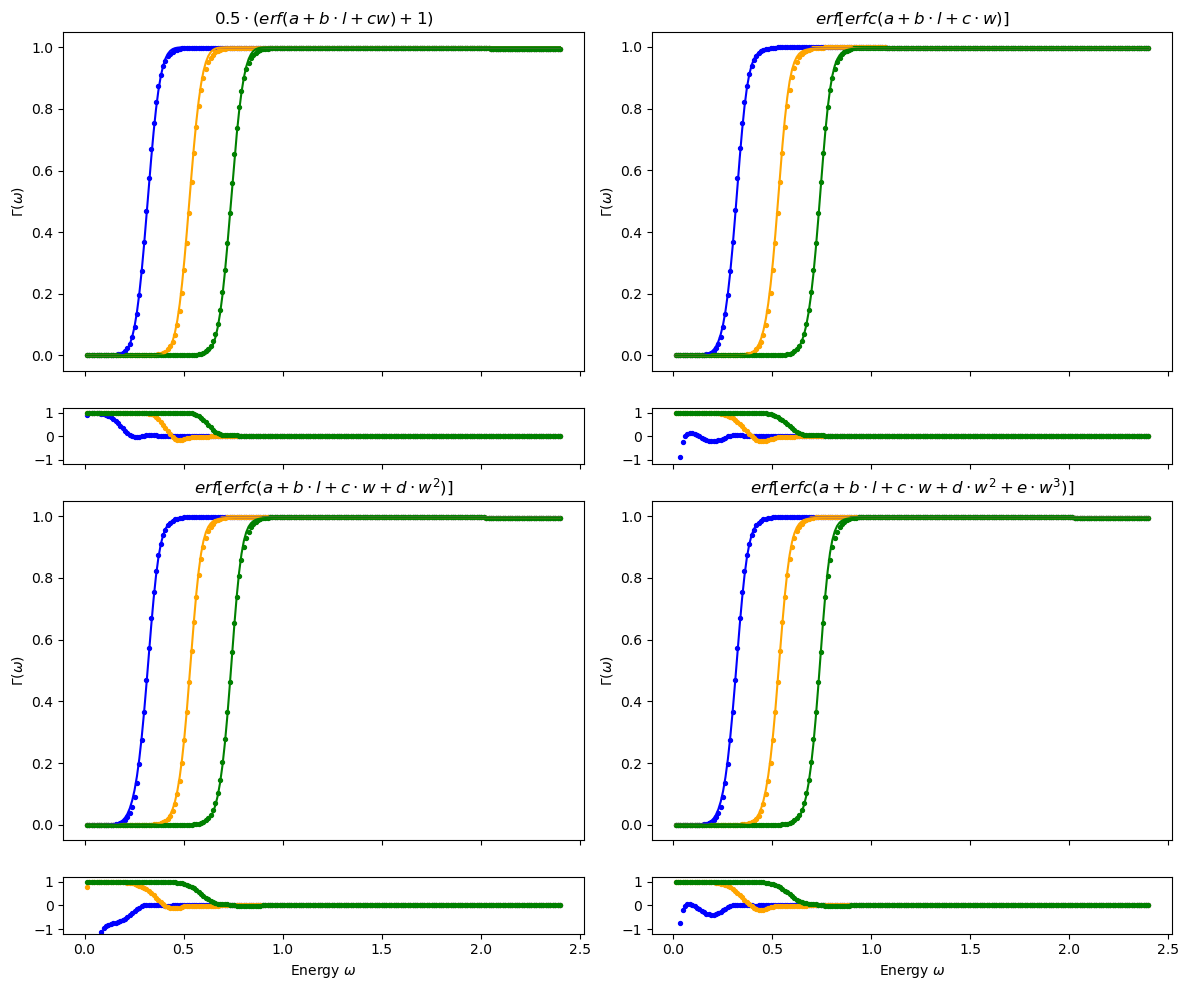

In [10]:
# Define fitting functions
def fit_function151(data, a, b, c):
    x, y = data
    return 0.5 * (erf(a + b*y + c*x) + 1)

def fit_function152(data, a, b, c):
    x, y = data
    return erf(erfc(a + b*y + c*x))

def fit_function153(data, a ,b, c, d):
    x, y = data
    return erf(erfc(a + b*y + c*x + d*x**2))

def fit_function154(data, a, b, c, d, e):
    x, y = data
    return erf(erfc(a + b*y + c*x + d*x**2 + e*x**3))

# Grid and flattening
l_value15 = np.array([1.5, 2.5, 3.5])
x_grid15, l_grid15 = np.meshgrid(s15x, l_value15, indexing='ij')

x_flat15 = x_grid15.flatten()  # shape (400, )
l_flat15 = l_grid15.flatten()  # shape (400, )
y_flat15 = s15_array.flatten()

# Fit the models
popt151, _ = curve_fit(fit_function151, (x_flat15, l_flat15), y_flat15, p0=[-0.1, -3.0, 14.0])
popt152, _ = curve_fit(fit_function152, (x_flat15, l_flat15), y_flat15, p0=[0.5, 2.2, -10.4])
popt153, _ = curve_fit(fit_function153, (x_flat15, l_flat15), y_flat15, p0=[0.5, 2.2, -10.4, -1.0])
popt154, _ = curve_fit(fit_function154, (x_flat15, l_flat15), y_flat15, p0=[0.5, 2.2, -10.4, -1.0, -2.5])

a_fit1, b_fit1, c_fit1 = popt151
print(f"Fitted 0.5 * (erf(a + b*l + c*w) + 1) parameters: a = {a_fit1:.3f}, b = {b_fit1:.3f}, c = {c_fit1:.3f}")
a_fit2, b_fit2, c_fit2 = popt152
print(f"Fitted erf(erfc(a + b*l + c*w)) parameters: a = {a_fit2:.3f}, b = {b_fit2:.3f}, c = {c_fit2:.3f}")
a_fit3, b_fit3, c_fit3, d_fit3 = popt153
print(f"Fitted erf(erfc(a + b*l + c*w + d*w^2)) parameters: a = {a_fit3:.3f}, b = {b_fit3:.3f}, c = {c_fit3:.3f}, d = {d_fit3:.3f}")
a_fit4, b_fit4, c_fit4, d_fit4, e_fit4 = popt154
print(f"Fitted erf(erfc(a + b*l + c*w + d*w^2 + e*w^3)) parameters: a = {a_fit4:.3f}, b = {b_fit4:.3f}, c = {c_fit4:.3f}, d = {d_fit4:.3f}, e = {e_fit4:.3f}")


# Create the figure with subplots and specified height ratios
fig, axs = plt.subplots(4, 2, figsize=(12, 10), sharex=True, gridspec_kw={'height_ratios': [6, 1] * 2})

# Plot configurations
fit_functions15 = [fit_function151, fit_function152, fit_function153, fit_function154]
params15 = [popt151, popt152, popt153, popt154]
titles15 = [
    r'$0.5 \cdot (erf(a + b \cdot l + cw) + 1)$',
    r'$erf[erfc(a + b \cdot l + c \cdot w)]$', 
    r'$erf[erfc(a + b \cdot l + c \cdot w + d \cdot w^2)]$', 
    r'$erf[erfc(a + b \cdot l + c \cdot w + d \cdot w^2 + e \cdot w^3)]$'
]

# Loop over the subplots for main plots and residuals
for i, (fit_func, popt, title) in enumerate(zip(fit_functions15, params15, titles15)):
    row = (i // 2) * 2   # To determine which row the main plot is on (0, 2)
    col = i % 2          # To determine which column (0 or 1)

    main_ax = axs[row, col]       # Main plot
    res_ax = axs[row + 1, col]    # Residuals plot just below


    # Plot fitted curves and data points for each 'l_value'
    for j, color in enumerate(['blue', 'orange', 'green']):
        main_ax.plot(s10x, fit_func((s15x, l_value15[j]), *popt), color=color)
        main_ax.scatter(s15x, s15_array[:, j], color=color, s=8, label=f'Data: s=1, l={j+1}')
        res_ax.scatter(s15x, (s15_array[:, j] - fit_func((s15x, l_value15[j]), *popt)) / s15_array[:, j], color=color, s=8)

    # Set titles and labels
    main_ax.set_title(title)
    main_ax.set_ylabel(r'$\Gamma(\omega)$')
    res_ax.set_ylim(-1.2, 1.2)

axs[-1, 0].set_xlabel(r'Energy $\omega$')
axs[-1, 1].set_xlabel(r'Energy $\omega$')
plt.tight_layout(h_pad=0.5)
plt.show()

### Using Scipy.optimize to fit $\Gamma^{s=2}_{l=2/3/4}$
Here, we try to fit the data of $\Gamma^{s=2}_{l=2/3/4}$ with 
$$\Gamma^{s=2}_{l=2/3/4} (\omega, l) =\frac{1}{2} [ {\rm erf}(a + b l + c\omega) + 1] \qquad{\rm scipy.optimize}$$
$$\Gamma^{s=2}_{l=2/3/4} (\omega, l) = {\rm erf} [{\rm erfc} (a + b l + c\omega)] $$ 
$$\Gamma^{s=2}_{l=2/3/4} (\omega, l) = {\rm erf} [{\rm erfc} (a + b l + c\omega + d\omega^2)] $$ 
$$\Gamma^{s=2}_{l=2/3/4} (\omega, l) = {\rm erf} [{\rm erfc} (a + b l + c\omega + d\omega^2 + e\omega^3)]$$ 
1. Fitted 0.5 * (erf(a + b*l + c*w) + 1) parameters: a = 0.752, b = -3.065, c = 14.140
2. Fitted erf(erfc(a + b*l + c*w)) parameters: a = -0.049, b = 2.278, c = -10.510
3. Fitted erf(erfc(a + b*l + c*w + d*w^2)) parameters: a = -0.404, b = 2.290, c = -9.259, d = -1.097
4. Fitted erf(erfc(a + b*l + c*w + d*w^2 + e*w^3)) parameters: a = 0.040, b = 2.265, c = -11.607, d = 3.260, e = -2.448

Fitted 0.5 * (erf(a + b*l + c*w) + 1) parameters: a = 0.651, b = -2.989, c = 13.912
Fitted erf(erfc(a + b*l + c*w)) parameters: a = 0.027, b = 2.216, c = -10.314
Fitted erf(erfc(a + b*l + c*w + d*w^2)) parameters: a = -0.389, b = 2.191, c = -8.758, d = -1.146
Fitted erf(erfc(a + b*l + c*w + d*w^2 + e*w^3)) parameters: a = -0.942, b = 2.219, c = -5.888, d = -6.340, e = 2.863


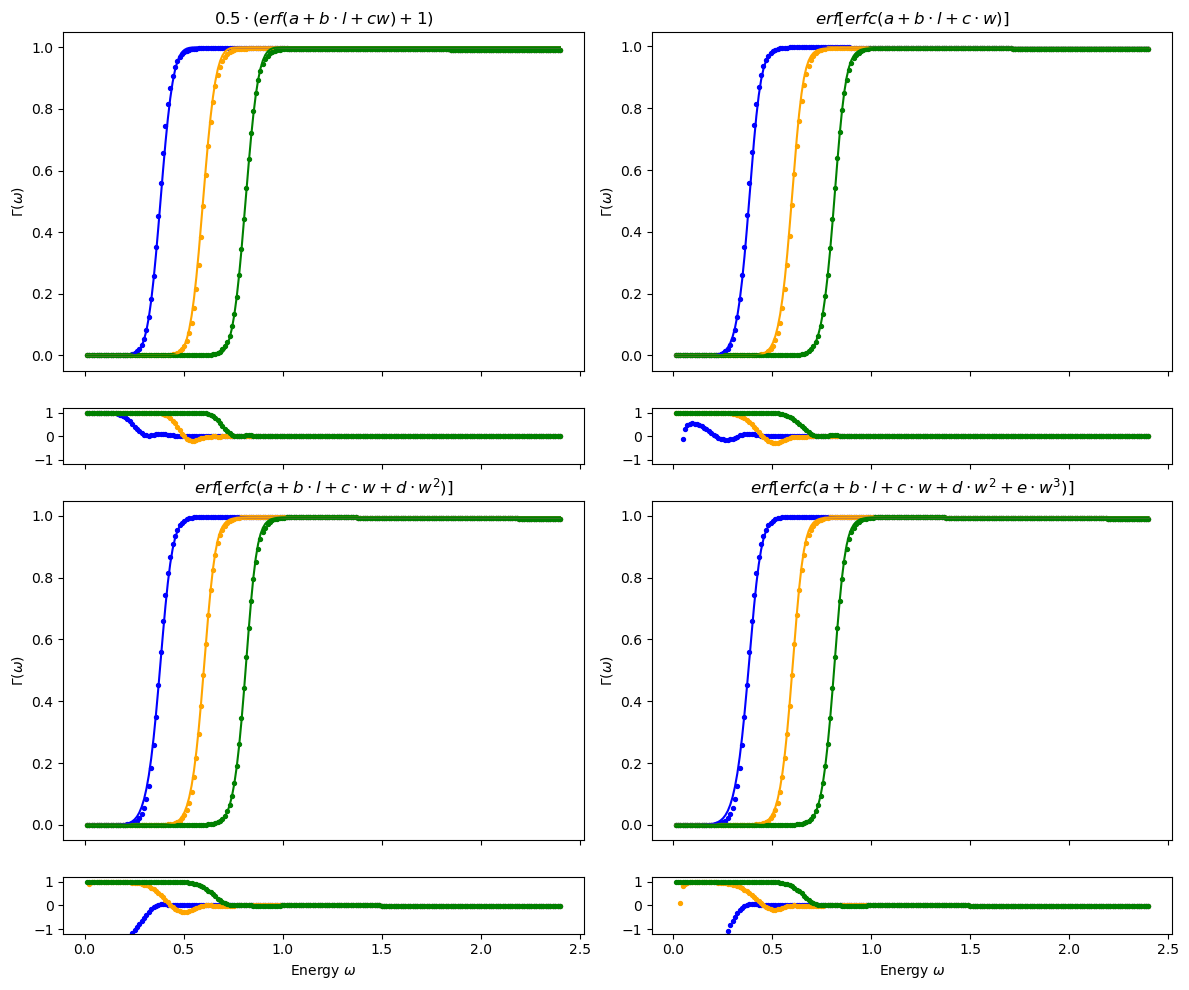

In [11]:
# Define fitting functions
def fit_function201(data, a, b, c):
    x, y = data
    return 0.5 * (erf(a + b*y + c*x) + 1)

def fit_function202(data, a, b, c):
    x, y = data
    return erf(erfc(a + b*y + c*x))

def fit_function203(data, a ,b, c, d):
    x, y = data
    return erf(erfc(a + b*y + c*x + d*x**2))

def fit_function204(data, a, b, c, d, e):
    x, y = data
    return erf(erfc(a + b*y + c*x + d*x**2 + e*x**3))

# Grid and flattening
l_value20 = np.array([2, 3, 4])
x_grid20, l_grid20 = np.meshgrid(s20x, l_value20, indexing='ij')

x_flat20 = x_grid20.flatten()  # shape (400, )
l_flat20 = l_grid20.flatten()  # shape (400, )
y_flat20 = s20_array.flatten()

# Fit the models
popt201, _ = curve_fit(fit_function201, (x_flat20, l_flat20), y_flat20, sigma=1.0/x_flat20, p0=[-0.1, -3.0, 14.0])
popt202, _ = curve_fit(fit_function202, (x_flat20, l_flat20), y_flat20, sigma=1.0/x_flat20, p0=[0.5, 2.2, -10.4])
popt203, _ = curve_fit(fit_function203, (x_flat20, l_flat20), y_flat20, sigma=1.0/x_flat20, p0=[0.5, 2.2, -10.4, -1.0])
popt204, _ = curve_fit(fit_function204, (x_flat20, l_flat20), y_flat20, sigma=1.0/x_flat20, p0=[0.5, 2.2, -10.4, -1.0, -2.5])

a_fit1, b_fit1, c_fit1 = popt201
print(f"Fitted 0.5 * (erf(a + b*l + c*w) + 1) parameters: a = {a_fit1:.3f}, b = {b_fit1:.3f}, c = {c_fit1:.3f}")
a_fit2, b_fit2, c_fit2 = popt202
print(f"Fitted erf(erfc(a + b*l + c*w)) parameters: a = {a_fit2:.3f}, b = {b_fit2:.3f}, c = {c_fit2:.3f}")
a_fit3, b_fit3, c_fit3, d_fit3 = popt203
print(f"Fitted erf(erfc(a + b*l + c*w + d*w^2)) parameters: a = {a_fit3:.3f}, b = {b_fit3:.3f}, c = {c_fit3:.3f}, d = {d_fit3:.3f}")
a_fit4, b_fit4, c_fit4, d_fit4, e_fit4 = popt204
print(f"Fitted erf(erfc(a + b*l + c*w + d*w^2 + e*w^3)) parameters: a = {a_fit4:.3f}, b = {b_fit4:.3f}, c = {c_fit4:.3f}, d = {d_fit4:.3f}, e = {e_fit4:.3f}")

# Create the figure with subplots and specified height ratios
fig, axs = plt.subplots(4, 2, figsize=(12, 10), sharex=True, gridspec_kw={'height_ratios': [6, 1] * 2})

# Plot configurations
fit_functions20 = [fit_function201, fit_function202, fit_function203, fit_function204]
params20 = [popt201, popt202, popt203, popt204]
titles20 = [
    r'$0.5 \cdot (erf(a + b \cdot l + cw) + 1)$',
    r'$erf[erfc(a + b \cdot l + c \cdot w)]$', 
    r'$erf[erfc(a + b \cdot l + c \cdot w + d \cdot w^2)]$', 
    r'$erf[erfc(a + b \cdot l + c \cdot w + d \cdot w^2 + e \cdot w^3)]$'
]

# Loop over the subplots for main plots and residuals
for i, (fit_func, popt, title) in enumerate(zip(fit_functions20, params20, titles20)):
    row = (i // 2) * 2   # To determine which row the main plot is on (0, 2)
    col = i % 2          # To determine which column (0 or 1)

    main_ax = axs[row, col]       # Main plot
    res_ax = axs[row + 1, col]    # Residuals plot just below


    # Plot fitted curves and data points for each 'l_value'
    for j, color in enumerate(['blue', 'orange', 'green']):
        main_ax.plot(s20x, fit_func((s20x, l_value20[j]), *popt), color=color)
        main_ax.scatter(s20x, s20_array[:, j], color=color, s=8, label=f'Data: s=1, l={j + 1}')
        res_ax.scatter(s20x, (s20_array[:, j] - fit_func((s20x, l_value20[j]), *popt)) / s20_array[:, j], color=color, s=8)

    # Set titles and labels
    main_ax.set_title(title)
    main_ax.set_ylabel(r'$\Gamma(\omega)$')
    res_ax.set_ylim(-1.2, 1.2)

axs[-1, 0].set_xlabel(r'Energy $\omega$')
axs[-1, 1].set_xlabel(r'Energy $\omega$')
plt.tight_layout(h_pad=0.5)
plt.show()